In [1]:
import matplotlib.pyplot as plt
from policy_eval.lower_bounds import stable
from foundry.util.registry import Registry

registry = Registry()

stable.register_datasets(registry)

data = registry.create("lower_bound/stable/1")
train_data, _ = data.split("train").as_pytree()

[[ 0.00000000e+00 -4.61082667e-01]
 [ 0.00000000e+00 -2.30541334e-01]
 [ 0.00000000e+00 -1.15270667e-01]
 [ 0.00000000e+00 -5.76353334e-02]
 [ 0.00000000e+00 -2.88176667e-02]
 [ 0.00000000e+00 -1.44088333e-02]
 [ 0.00000000e+00 -7.20441667e-03]
 [ 0.00000000e+00 -3.60220834e-03]
 [ 0.00000000e+00 -1.80110417e-03]
 [ 0.00000000e+00 -9.00552084e-04]
 [ 0.00000000e+00 -4.50276042e-04]
 [ 0.00000000e+00 -2.25138021e-04]
 [ 0.00000000e+00 -1.12569011e-04]
 [ 0.00000000e+00 -5.62845053e-05]
 [ 0.00000000e+00 -2.81422526e-05]
 [ 0.00000000e+00 -1.40711263e-05]
 [ 0.00000000e+00 -7.03556316e-06]
 [ 0.00000000e+00 -3.51778158e-06]
 [ 0.00000000e+00 -1.75889079e-06]
 [ 0.00000000e+00 -8.79445395e-07]
 [ 0.00000000e+00 -4.39722697e-07]
 [ 0.00000000e+00 -2.19861349e-07]
 [ 0.00000000e+00 -1.09930674e-07]
 [ 0.00000000e+00 -5.49653372e-08]
 [ 0.00000000e+00 -2.74826686e-08]
 [ 0.00000000e+00 -1.37413343e-08]
 [ 0.00000000e+00 -6.87066715e-09]
 [ 0.00000000e+00 -3.43533357e-09]
 [ 0.00000000e+00 -1

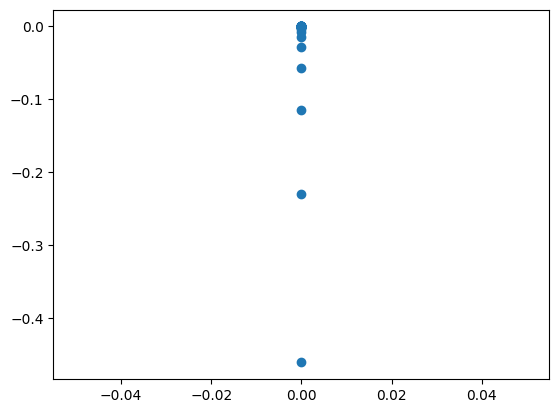

In [2]:
states = train_data.state[3, :, :2]
print(states)
plt.plot(states[:, 0], states[:, 1], "o")

In [8]:
import wandb
import pandas as pd
api = wandb.Api()
sweep = api.sweep("dpfrommer-projects/lower_bound/6r520rmo")

data = []
for run in sweep.runs:
    if run.state == "finished":
        summary = run.summary
        data.append({
            "method": run.config["method"],
            "trajectories": run.config["train_trajectories"],
            "action_length": run.config["action_length"],
            "timesteps": run.config["timesteps"],
            "reward_mean": summary["reward_mean"],
            "reward_std": summary["reward_std"],
        })
data = pd.DataFrame(data)
data

,method,trajectories,action_length,timesteps,reward_mean,reward_std
0,bc,200,16,50,-4.161410e+06,6.922346e+06
1,bc,100,16,50,-6.433332e+06,7.277387e+06
2,bc,50,16,50,-1.064569e+07,8.225080e+06
3,bc,200,16,30,-3.405697e+01,7.551555e+01
4,bc,100,16,30,-7.642190e+01,1.445255e+02
...,...,...,...,...,...,...
139,bc,100,1,5,-2.454475e+03,4.095005e+03
140,bc,50,1,5,-8.985099e+02,1.954440e+03
141,bc,200,1,3,-6.802574e+00,1.310208e+01
142,bc,100,1,3,-8.638138e+00,1.441013e+01


In [9]:
# import matplotlib.pyplot as plt

# colors = ["red", "blue"]
# styles = ["-", "--", "-.", ":"]
# for (method, method_color) in zip(data.method.unique(), colors):
#     method_data = data[data.method == method]
#     for (N, N_style) in zip(method_data.trajectories.unique(), styles):
#         N_data = method_data[method_data.trajectories == N]
#         # plt.errorbar(
#         #     N_data.timesteps, 
#         #     -N_data.reward_mean, 
#         #     yerr=N_data.reward_std, 
#         #     label=f"{method} N={N}"
#         # )
#         plt.plot(
#             N_data.timesteps, 
#             -N_data.reward_mean, 
#             label=f"{method} N={N}",
#             color=method_color,
#             linestyle=N_style
#         )
# plt.xlabel("Timesteps")
# plt.ylabel("Average State Norm")
# # plt.yscale("log")
# plt.legend()

   method  trajectories  action_length  timesteps   reward_mean    reward_std
1      bc           100             16         50 -6.433332e+06  7.277387e+06
4      bc           100             16         30 -7.642190e+01  1.445255e+02
7      bc           100             16         25 -4.487154e+01  8.485784e+01
10     bc           100             16         20 -1.345421e+01  2.543805e+01
13     bc           100             16         15 -7.900935e-02  1.384428e-01
16     bc           100             16         10 -6.944101e-02  1.216838e-01
19     bc           100             16          5 -4.551217e-02  7.831253e-02
22     bc           100             16          3 -3.869841e-02  6.521318e-02
   method  trajectories  action_length  timesteps   reward_mean    reward_std
25     bc           100             12         50 -9.201251e+07  8.385534e+07
28     bc           100             12         30 -2.286092e+04  4.214660e+04
31     bc           100             12         25 -6.311336e+01 

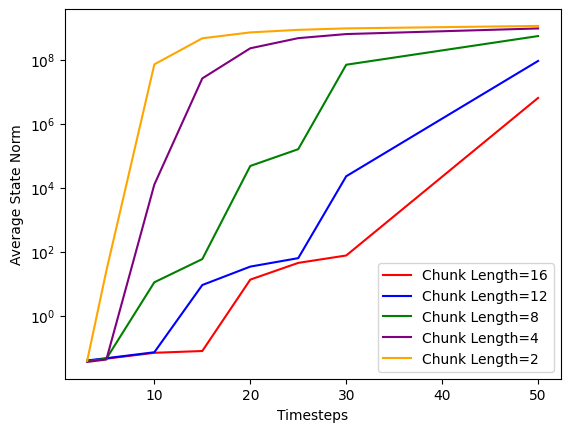

In [ ]:
import matplotlib.pyplot as plt

colors = ["red", "blue", "green", "purple", "orange", "brown"]
for (chunk_length, color) in zip(data.action_length.unique(), colors):
    chunk_data = data[(data.action_length == chunk_length) & (data.trajectories == 100)]
    print(chunk_data)
    plt.plot(
        chunk_data.timesteps, 
        -chunk_data.reward_mean, 
        label=f"Chunk Length={chunk_length}",
        color=color
    )
plt.yscale("log")
plt.xlabel("Timesteps")
plt.ylabel("Average State Norm")
plt.legend()